# Trading with Python and Binance - Introduction to the API

__Insert your Credentials here__:

In [37]:
api_key = "1YyQbC0fmhZN9GIw0OzKD0L7ku4DNwBIpGI8fBIJmjkPGaJ9OenFCJNonVSIdV4u"
secret_key = "iQcVaOHQF7P3Y4srHRnT1UBgLM0EzUioiYZXUpWe2rUGbe5ayjoUSigA5ja9qk96"

## Installing required Libraries/Packages

Install python-binance with:
- pip install python-binance 

(first: conda update anaconda) 

## Creating a Connection

In [38]:
from binance.client import Client

If you have an account on __Binance.com__ (non-US users)

In [39]:
client = Client(api_key=api_key, api_secret=secret_key, testnet=True)

In [40]:
client

In [41]:
client.get_account() # account details

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'updateTime': 1651642214211,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

If you have an account on __Binance.US__ (US residents) <br>
(If you are using an exchange from the US, Japan or other TLD then make sure pass tld=’us’ when creating the client.)


## General account/system Info

__Official API Documentation Site:__

https://binance-docs.github.io/apidocs/spot/en/#introduction

__API Wrapper (python-binance) Documentation Site:__

https://python-binance.readthedocs.io/en/latest/index.html

In [42]:
import pandas as pd

In [43]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet=True)

In [44]:
client.ping() # Test connectivity 

{}

In [45]:
client.get_system_status()

{'status': 0, 'msg': 'normal'}

In [46]:
account = client.get_account()
account

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'updateTime': 1651642214211,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

In [47]:
account["accountType"] # account Type (Spot, Futures)

'SPOT'

In [48]:
pd.to_datetime(account["updateTime"], unit = "ms") # Last Update -> UTC Time

Timestamp('2022-05-04 05:30:14.211000')

In [49]:
account["balances"] # asset balances

[{'asset': 'BNB', 'free': '1000.00000000', 'locked': '0.00000000'},
 {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
 {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
 {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
 {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
 {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
 {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
 {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}]

In [50]:
df = pd.DataFrame(account["balances"])
df

,asset,free,locked
0,BNB,1000.00000000,0.00000000
1,BTC,1.00000000,0.00000000
2,BUSD,10000.00000000,0.00000000
3,ETH,100.00000000,0.00000000
4,LTC,500.00000000,0.00000000
5,TRX,500000.00000000,0.00000000
6,USDT,10000.00000000,0.00000000
7,XRP,50000.00000000,0.00000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asset   8 non-null      object
 1   free    8 non-null      object
 2   locked  8 non-null      object
dtypes: object(3)
memory usage: 320.0+ bytes


In [52]:
df.free = pd.to_numeric(df.free, errors="coerce")
df.locked = pd.to_numeric(df.locked, errors="coerce")

In [53]:
df.loc[df.free > 0]

,asset,free,locked
0,BNB,1000.0,0.0
1,BTC,1.0,0.0
2,BUSD,10000.0,0.0
3,ETH,100.0,0.0
4,LTC,500.0,0.0
5,TRX,500000.0,0.0
6,USDT,10000.0,0.0
7,XRP,50000.0,0.0


In [ ]:
client.get_asset_balance(asset = "BTC")

In [ ]:
client.get_asset_balance(asset = "ETH")

In [ ]:
float(client.get_asset_balance(asset="EUR")["free"]) 

In [ ]:
snap = client.get_account_snapshot(type = "SPOT") # daily account snapshot
snap

In [ ]:
snap = pd.json_normalize(snap["snapshotVos"])
snap

In [ ]:
snap.updateTime = pd.to_datetime(snap["updateTime"], unit = "ms") 

In [ ]:
snap

In [ ]:
snap["data.balances"][0]

In [ ]:
client.get_exchange_info()["rateLimits"] # API Limits

In [ ]:
client.get_all_coins_info() # asset/coin Info

In [ ]:
coins = pd.DataFrame(client.get_all_coins_info()) # asset/coin Info
coins

In [ ]:
coins.loc[coins.coin == "BTC"]

In [ ]:
coins.loc[coins.coin == "EUR"]

In [ ]:
client.get_trade_fee(symbol = "BTCUSDT")

In [ ]:
client.get_trade_fee(symbol = "BTCEUR")

In [ ]:
client.get_trade_fee(symbol = "BUSDUSDT") # zero commissions for stable coin pairs

In [ ]:
client.get_symbol_info(symbol = "BTCEUR") # information on symbol / pair

## Getting (current) Market Data

In [ ]:
from binance.client import Client
import pandas as pd

In [ ]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com")

__Current Prices__

In [54]:
client.get_symbol_ticker(symbol = "BTCUSDT") # current price for one symbol

{'symbol': 'BTCUSDT', 'price': '38976.55000000'}

In [ ]:
float(client.get_symbol_ticker(symbol = "BTCUSDT")["price"])

In [ ]:
client.get_avg_price(symbol = "BTCUSDT") # current average price

In [ ]:
# get current prices for all pairs
prices = client.get_all_tickers()
prices

In [ ]:
df = pd.DataFrame(prices)
df

In [ ]:
df.info()

In [ ]:
df[df.symbol.str.contains("ETH")]

In [ ]:
df[df.symbol.str.contains("BTC") & df.symbol.str.contains("USD")]

In [ ]:
df[df.symbol.str.contains("BTC") & df.symbol.str.contains("EUR")]

In [ ]:
last24 = client.get_ticker(symbol = "BTCUSDT") # 24H Price change statistic
last24

In [ ]:
last24["openTime"]

In [ ]:
pd.to_datetime(last24["openTime"], unit = "ms") 

In [ ]:
pd.to_datetime(last24["closeTime"], unit = "ms") 

In [ ]:
open_price = float(last24["openPrice"])
open_price

In [ ]:
high_price = float(last24["highPrice"])
high_price

In [ ]:
low_price = float(last24["lowPrice"])
low_price

In [ ]:
close_price = float(last24["lastPrice"])
close_price

In [ ]:
close_price - open_price

In [ ]:
(close_price/open_price - 1) * 100

## Getting Historical Data (OHLC & Volume) - Part 1

In [ ]:
from binance.client import Client
import pandas as pd

In [ ]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com")

In [9]:
timestamp = client._get_earliest_valid_timestamp(symbol = "BTCUSDT", interval = "1d")
timestamp # earliest data available on Binance

1649203200000

In [ ]:
pd.to_datetime(timestamp, unit = "ms") # earliest data available on Binance

In [55]:
bars = client.get_historical_klines(symbol = "BTCUSDT",
                                    interval = "1d", start_str = timestamp, limit = 1000)
bars

[[1651622400000,
  '38127.16000000',
  '48200.00000000',
  '9000.00000000',
  '38982.16000000',
  '558.46993500',
  1651708799999,
  '21594841.89651449',
  18176,
  '357.84750700',
  '13838748.72854733',
  '0']]

In [56]:
df = pd.DataFrame(bars)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1651622400000,38127.16000000,48200.00000000,9000.00000000,38982.16000000,558.46993500,1651708799999,21594841.89651449,18176,357.84750700,13838748.72854733,0


In [57]:
df["Date"] = pd.to_datetime(df.iloc[:,0], unit = "ms")

In [58]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,Date
0,1651622400000,38127.16000000,48200.00000000,9000.00000000,38982.16000000,558.46993500,1651708799999,21594841.89651449,18176,357.84750700,13838748.72854733,0,2022-05-04


In [59]:
df.columns = ["Open Time", "Open", "High", "Low", "Close",
              "Volume", "Clos Time", "Quote Asset Volume", 
              "Number of Trades", "Taker Buy Base Asset Volume",
              "Taker Buy Quote Asset Volume", "Ignore", "Date" ]

In [60]:
df

,Open Time,Open,High,Low,Close,Volume,Clos Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore,Date
0,1651622400000,38127.16000000,48200.00000000,9000.00000000,38982.16000000,558.46993500,1651708799999,21594841.89651449,18176,357.84750700,13838748.72854733,0,2022-05-04


In [61]:
df = df[["Date", "Open", "High", "Low", "Close", "Volume"]].copy()

In [62]:
df

,Date,Open,High,Low,Close,Volume
0,2022-05-04,38127.16000000,48200.00000000,9000.00000000,38982.16000000,558.46993500


In [63]:
df.set_index("Date", inplace = True)

In [64]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-04,38127.16000000,48200.00000000,9000.00000000,38982.16000000,558.46993500


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2022-05-04 to 2022-05-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    1 non-null      object
 1   High    1 non-null      object
 2   Low     1 non-null      object
 3   Close   1 non-null      object
 4   Volume  1 non-null      object
dtypes: object(5)
memory usage: 48.0+ bytes


In [66]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors = "coerce")

## Getting Historical Data (OHLC & Volume) - Part 2

In [67]:
def get_history(symbol, interval, start, end = None):
    bars = client.get_historical_klines(symbol = symbol, interval = interval,
                                        start_str = start, end_str = end, limit = 1000)
    df = pd.DataFrame(bars)
    df["Date"] = pd.to_datetime(df.iloc[:,0], unit = "ms")
    df.columns = ["Open Time", "Open", "High", "Low", "Close", "Volume",
                  "Clos Time", "Quote Asset Volume", "Number of Trades",
                  "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore", "Date"]
    df = df[["Date", "Open", "High", "Low", "Close", "Volume"]].copy()
    df.set_index("Date", inplace = True)
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors = "coerce")
    
    return df

In [68]:
timestamp

1649203200000

In [69]:
type(timestamp)

int

__Daily Data until Today/Now__

In [70]:
df = get_history(symbol = "BTCUSDT", interval = "1d", start = timestamp)
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-04,38127.16,48200.0,9000.0,39036.41,567.492029


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2022-05-04 to 2022-05-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1 non-null      float64
 1   High    1 non-null      float64
 2   Low     1 non-null      float64
 3   Close   1 non-null      float64
 4   Volume  1 non-null      float64
dtypes: float64(5)
memory usage: 48.0 bytes


__Daily Data for specified Time Period__

In [72]:
from datetime import datetime

dt_obj = datetime.strptime("04-04-2022", "%d-%m-%Y")
millisec = dt_obj.timestamp() * 1000

type(millisec)

float

In [73]:
df = get_history(symbol = "BTCUSDT", 
                 interval = "1d", 
                 start = int(datetime.strptime("12-04-2022", "%d-%m-%Y").timestamp() * 1000))
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-04,38127.16,48200.0,9000.0,39026.33,575.368865


valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M

__Weekly Data for specified Time Period__

In [35]:
df = get_history(symbol = "BTCUSDT", interval = "1w", start = "2021-01-01", end = "2021-06-30")
df

Task was destroyed but it is pending!
task: <Task pending name='Task-13' coro=<ReconnectingWebsocket._read_loop() running at /Users/manaadvice/opt/anaconda3/envs/binance_trading/lib/python3.8/site-packages/binance/streams.py:130> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fb2326e1970>()]>>
Task was destroyed but it is pending!
task: <Task pending name='Task-70' coro=<ReconnectingWebsocket._read_loop() running at /Users/manaadvice/opt/anaconda3/envs/binance_trading/lib/python3.8/site-packages/binance/streams.py:130> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fb23296ddf0>()]>>


error: bad escape \d at position 7

__Monthly Data for specified Time Period__

In [ ]:
df = get_history(symbol = "BTCUSDT", interval = "1M", start = "2021-01-01", end = "2021-06-15")
df

__Most recent Monthly Data (until today/now)__

In [36]:
df = get_history(symbol = "BTCUSDT", interval = "1M", start = "2021-01-01")
df

error: bad escape \d at position 7

__Intraday Data (1H) for specified Time Period__

In [ ]:
df = get_history(symbol = "BTCUSDT", interval = "1h", start = "2021-10-01", end = "2021-10-05")
df

In [ ]:
df = get_history(symbol = "BTCUSDT", interval = "1h",
                 start = "2021-10-01 10:00:00", end = "2021-10-05 16:00:00")
df

__Intraday Data (1m) for specified Time Period__

In [ ]:
df = get_history(symbol = "BTCUSDT", interval = "1m",
                 start = "2021-10-01 10:29:00", end = "2021-10-05 16:55:00")
df

__Most recent (last 2 hours) Intraday Data (1m)__

In [12]:
from datetime import datetime, timedelta

In [13]:
now = datetime.utcnow()
now

datetime.datetime(2022, 4, 24, 16, 58, 17, 402119)

In [14]:
two_hours_before = now - timedelta(hours = 2)
two_hours_before

datetime.datetime(2022, 4, 24, 14, 58, 17, 402119)

In [15]:
str(two_hours_before)

'2022-04-24 14:58:17.402119'

In [16]:
print(two_hours_before.timestamp() * 1000)
print(datetime.fromtimestamp(two_hours_before.timestamp()))

1650805097402.119
2022-04-24 14:58:17.402119


In [17]:
two_hours_before.time()

datetime.time(14, 58, 17, 402119)

In [18]:
df = get_history(symbol = "BTCUSDT", interval = "1m", start = int(two_hours_before.timestamp() * 1000))
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-24 12:59:00,39552.42,39587.03,39552.38,39582.37,2.344648
2022-04-24 13:00:00,39582.38,39583.71,39574.81,39574.82,0.994067
2022-04-24 13:01:00,39574.81,39579.50,39574.81,39579.11,1.161841
2022-04-24 13:02:00,39579.12,39579.12,39566.80,39566.80,0.923875
2022-04-24 13:03:00,39566.81,39566.83,39554.69,39554.70,0.803598
...,...,...,...,...,...
2022-04-24 16:54:00,39120.01,39197.10,39112.83,39194.47,3.782258
2022-04-24 16:55:00,39194.47,39774.78,39194.47,39650.39,4.700105
2022-04-24 16:56:00,39620.66,39621.16,39493.09,39526.68,4.102382


## Excursus: Loading Historical Data (csv) from the Website

In [ ]:
import pandas as pd

In [ ]:
url = r"C:\Users\hagma\OneDrive\Desktop\BTCUSDT-1h-2021-09\BTCUSDT-1h-2021-09.csv" # insert your filepath here
url

In [ ]:
df = pd.read_csv(url, header = None)
df

In [ ]:
df["Date"] = pd.to_datetime(df.iloc[:,0], unit = "ms")
df

In [ ]:
df.columns = ["Open Time", "Open", "High", "Low", "Close", "Volume",
                  "Clos Time", "Quote Asset Volume", "Number of Trades",
                  "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore", "Date"]
df

In [ ]:
df = df[["Date", "Open", "High", "Low", "Close", "Volume"]].copy()
df.set_index("Date", inplace = True)

#not required:
#for column in df.columns:
    #df[column] = pd.to_numeric(df[column], errors = "coerce")

In [ ]:
df

In [ ]:
df.info()

## Streaming Market Data (Part 1)

In [19]:
from binance import ThreadedWebsocketManager
import pandas as pd

In [20]:
def stream_data(msg):
    ''' define how to process incoming WebSocket messages '''
    print(msg)

In [21]:
# initialize and start the WebSocket
twm = ThreadedWebsocketManager()
twm.start()

If you have an account on __Binance.US__ (US residents) <br>
(If you are using an exchange from the US, Japan or other TLD then make sure pass tld=’us’ when initializing the TWM.)

In [ ]:
# initialize and start the WebSocket in the us
# twm = ThreadedWebsocketManager(tld = "us")
# twm.start()

In [ ]:
twm

__Different Market Streams available:__ https://binance-docs.github.io/apidocs/spot/en/#websocket-market-streams

__Individual Symbol Mini Ticker:__ 24hr rolling window mini-ticker statistics. These are NOT the statistics of the UTC day, but a 24hr rolling window for the previous 24hrs.

In [22]:
# subscribe to the stream
twm.start_symbol_miniticker_socket(callback = stream_data, symbol = "BTCUSDT")

'btcusdt@miniTicker'

{'e': '24hrMiniTicker', 'E': 1650819521904, 's': 'BTCUSDT', 'c': '39506.62000000', 'o': '39851.81000000', 'h': '39948.27000000', 'l': '38929.62000000', 'v': '23623.86629000', 'q': '935502109.04979550'}
{'e': '24hrMiniTicker', 'E': 1650819522945, 's': 'BTCUSDT', 'c': '39529.09000000', 'o': '39851.81000000', 'h': '39948.27000000', 'l': '38929.62000000', 'v': '23628.22107000', 'q': '935674201.51734590'}
{'e': '24hrMiniTicker', 'E': 1650819523753, 's': 'BTCUSDT', 'c': '39529.11000000', 'o': '39851.81000000', 'h': '39948.27000000', 'l': '38929.62000000', 'v': '23628.03597000', 'q': '935666810.32165850'}
{'e': '24hrMiniTicker', 'E': 1650819524952, 's': 'BTCUSDT', 'c': '39534.05000000', 'o': '39851.81000000', 'h': '39948.27000000', 'l': '38929.62000000', 'v': '23628.45391000', 'q': '935683255.96398070'}
{'e': '24hrMiniTicker', 'E': 1650819525975, 's': 'BTCUSDT', 'c': '39538.78000000', 'o': '39851.82000000', 'h': '39948.27000000', 'l': '38929.62000000', 'v': '23628.59595000', 'q': '935688871.2

In [23]:
twm.stop() # stop the Websocket/Stream

{'e': '24hrMiniTicker', 'E': 1650819536023, 's': 'BTCUSDT', 'c': '39553.64000000', 'o': '39851.81000000', 'h': '39948.27000000', 'l': '38929.62000000', 'v': '23641.09436000', 'q': '936182688.66415940'}


__Individual Symbol Mini Ticker Output/Message:__

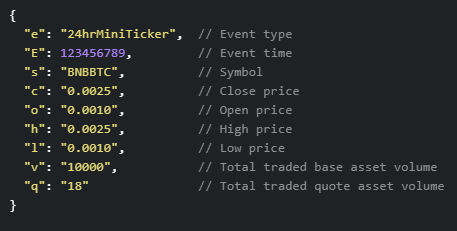

## Streaming Market Data (Part 2)

In [24]:
def stream_data(msg):
    ''' define how to process incoming WebSocket messages '''
    
    time = pd.to_datetime(msg["E"], unit = "ms")
    price = msg["c"]
    
    print("Time: {} | Price: {}".format(time, price))

In [25]:
twm = ThreadedWebsocketManager()
twm.start()

In [26]:
twm.start_symbol_miniticker_socket(callback = stream_data, symbol = "BTCUSDT")

'btcusdt@miniTicker'

Time: 2022-04-24 16:59:45.239000 | Price: 39533.67000000
Time: 2022-04-24 16:59:46.261000 | Price: 39533.67000000
Time: 2022-04-24 16:59:47.233000 | Price: 39533.68000000
Time: 2022-04-24 16:59:48.050000 | Price: 39533.67000000
Time: 2022-04-24 16:59:49.494000 | Price: 39533.68000000
Time: 2022-04-24 16:59:50.435000 | Price: 39516.04000000
Time: 2022-04-24 16:59:51.459000 | Price: 39511.10000000
Time: 2022-04-24 16:59:52.446000 | Price: 39507.15000000
Time: 2022-04-24 16:59:53.473000 | Price: 39506.86000000
Time: 2022-04-24 16:59:53.809000 | Price: 39506.85000000
Time: 2022-04-24 16:59:55.470000 | Price: 39500.00000000
Time: 2022-04-24 16:59:56.511000 | Price: 39500.01000000
Time: 2022-04-24 16:59:57.486000 | Price: 39500.00000000
Time: 2022-04-24 16:59:58.462000 | Price: 39495.38000000
Time: 2022-04-24 16:59:59.394000 | Price: 39490.01000000
Time: 2022-04-24 17:00:00.519000 | Price: 39490.01000000
Time: 2022-04-24 17:00:01.531000 | Price: 39490.01000000
Time: 2022-04-24 17:00:02.53200

In [27]:
twm.stop()

Time: 2022-04-24 17:00:13.548000 | Price: 39523.74000000


## Streaming and Collecting Real-Time Candles

In [ ]:
from binance import ThreadedWebsocketManager
import pandas as pd

__Kline/Candlestick Stream:__ push updates to the current klines/candlestick every second.

https://binance-docs.github.io/apidocs/spot/en/#kline-candlestick-streams

__Output/Message:__

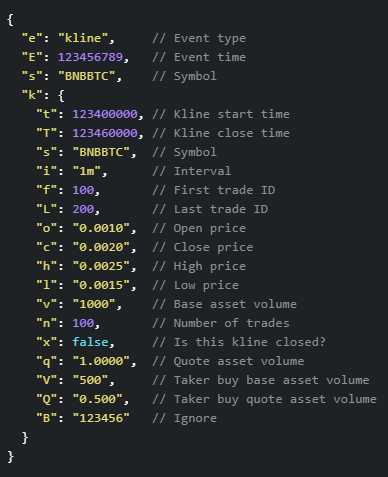

In [28]:
df = pd.DataFrame(columns = ["Open", "High", "Low", "Close", "Volume", "Complete"])
df

,Open,High,Low,Close,Volume,Complete


In [30]:
def stream_candles(msg):
    ''' define how to process incoming WebSocket messages '''
    
    # extract the required items from msg
    event_time = pd.to_datetime(msg["E"], unit = "ms")
    start_time = pd.to_datetime(msg["k"]["t"], unit = "ms")
    first   = float(msg["k"]["o"])
    high    = float(msg["k"]["h"])
    low     = float(msg["k"]["l"])
    close   = float(msg["k"]["c"])
    volume  = float(msg["k"]["v"])
    complete=       msg["k"]["x"]
    
    # print out
    print("Time: {} | Price: {}".format(event_time, close))
    
    # feed df (add new bar / update latest bar)
    df.loc[start_time] = [first, high, low, close, volume, complete]

In [31]:
twm = ThreadedWebsocketManager()
twm.start()

valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M

In [32]:
twm.start_kline_socket(callback = stream_candles, symbol = "BTCUSDT", interval = "1m")

'btcusdt@kline_1m'

Time: 2022-04-24 17:04:51.938000 | Price: 39406.04
Time: 2022-04-24 17:04:54.492000 | Price: 39406.03
Time: 2022-04-24 17:04:56.914000 | Price: 39403.0
Time: 2022-04-24 17:04:59.170000 | Price: 39396.68
Time: 2022-04-24 17:05:00.005000 | Price: 39391.43
Time: 2022-04-24 17:05:02.029000 | Price: 39391.44
Time: 2022-04-24 17:05:04.100000 | Price: 39391.44
Time: 2022-04-24 17:05:06.207000 | Price: 39391.44
Time: 2022-04-24 17:05:08.248000 | Price: 39375.68
Time: 2022-04-24 17:05:10.560000 | Price: 39370.0
Time: 2022-04-24 17:05:12.760000 | Price: 39362.79
Time: 2022-04-24 17:05:14.761000 | Price: 39356.89
Time: 2022-04-24 17:05:16.911000 | Price: 39372.28
Time: 2022-04-24 17:05:19.358000 | Price: 39367.52


In [33]:
twm.stop()

Time: 2022-04-24 17:05:21.592000 | Price: 39367.51


In [34]:
df

,Open,High,Low,Close,Volume,Complete
2022-04-24 17:04:00,39427.25,39439.91,39391.43,39391.43,21.27631,True
2022-04-24 17:05:00,39391.43,39391.44,39355.80,39367.51,21.14278,False


In [ ]:
df.info()

## Creating a Test Order

In [ ]:
from binance.client import Client

In [ ]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com")

In [ ]:
# place a test market buy order, to place an actual order use the create_order function
order = client.create_test_order(symbol = "BTCEUR", side = "BUY", type = "MARKET", quantity = 0.1)

In [ ]:
order

-> Paper Trading in the __Spot Testnet__ (see next Lectures)!!!